###**Column Details**
Id: A unique identifier for each trip

Vendor Id: A unique identifier for vendor

Pickup Datetime: Date and time of pickup

Dropoff Datetime: Date and time of dropoff

Passenger Count: The number of passengers in the vehicle (driver entered value)

Pickup Longitude: The longitude where the meter was engaged

Pickup Latitude: The latitude where the meter was engaged

Dropoff Longitude: The longitude where the meter was disengaged

Dropoff Latitude: The latitude where the meter was disengaged

Store and Fwd Flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Trip Duration: Duration of time in seconds

###Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [73]:
from geopy.distance import great_circle

In [74]:
!pip freeze > requirements.txt

In [75]:
!dir



 Volume in drive C is OS
 Volume Serial Number is 9A61-A8D2

 Directory of C:\Users\Asus

08/13/2024  12:11 AM    <DIR>          .
08/13/2024  12:11 AM    <DIR>          ..
05/13/2024  04:29 PM               990 .bash_history
06/03/2024  12:26 PM    <DIR>          .bitrock
06/04/2024  08:00 PM    <DIR>          .cache
07/29/2023  11:54 PM    <DIR>          .cisco
08/12/2024  07:03 PM    <DIR>          .docker
08/21/2023  02:07 AM                29 .gitconfig
07/10/2024  02:58 AM    <DIR>          .ipynb_checkpoints
01/12/2024  12:21 AM    <DIR>          .ipython
11/05/2023  02:26 PM    <DIR>          .jupyter
09/28/2023  05:49 PM    <DIR>          .matplotlib
01/05/2023  08:20 PM    <DIR>          .ms-ad
06/11/2022  11:39 PM    <DIR>          .spss
05/19/2024  10:26 PM    <DIR>          .ssh
09/15/2023  03:04 PM    <DIR>          .streamlit
08/27/2023  03:53 PM    <DIR>          .venv
08/22/2023  04:15 PM    <DIR>          .vscode
06/04/2024  09:57 PM             1,334 1.10.0
04/09/202

In [76]:
!type requirements.txt



07/09/2024  10:04 PM            24,760 hubert (1).ipynb
07/09/2024  10:21 PM            31,889 hubert .ipynb
07/10/2024  03:00 AM             5,907 HubertPEX.ipynb
11/23/2023  01:16 PM    <DIR>          iGrow-main
11/20/2023  10:06 PM        64,273,850 iGrow-main .zip
07/22/2023  04:14 PM                 0 index.html
05/13/2024  01:54 AM                 0 install-service-apm-server.ps1
05/19/2024  10:55 PM       849,145,344 kibana.img
06/04/2024  10:39 PM             1,077 LICENSE
04/09/2024  12:22 PM    <DIR>          Links
03/17/2024  03:14 PM            15,442 missing_dataset_falcon9.xlsx
04/09/2024  12:22 PM    <DIR>          Music
02/21/2024  01:28 AM         4,174,476 new_dataset_with_duration_distance.csv
02/16/2024  09:26 PM            25,332 NYC Project.ipynb
02/16/2024  10:09 PM         4,194,304 NYC.csv
02/28/2024  10:27 PM            45,578 NYC2.ipynb
08/07/2024  12:51 PM    <DIR>          NYCProject
08/13/2024  12:11 AM         1,230,723 NYC__Taxi_Time_Prediction.ipynb
04

##Importing the Dataset

In [77]:
df=pd.read_csv("C:/Users/Asus/Desktop/پروژه های دیتاساینس/4/")

##Exploring the Dataset

In [78]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,duration
0,id2875421,2,3/14/2016 17:24,3/14/2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2159.3,232.7
1,id2377394,1,6/12/2016 0:43,6/12/2016 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2512.9,336.1
2,id3858529,2,1/19/2016 11:35,1/19/2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9934.4,898.5
3,id3504673,2,4/6/2016 19:32,4/6/2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1777.6,242.7
4,id2181028,2,3/26/2016 13:30,3/26/2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1606.6,194.0


### Dataset Rows & Columns count

In [79]:
# finding no of rows and no of columns in data set
print('no of rows:',df.shape[0])
print('no of columns:',df.shape[1])

no of rows: 1048575
no of columns: 13


### Dataset Information

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
 11  distance            1048561 non-null  float64
 12  duration            1048561 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 104.0+ MB


By this operation we know that there is no missing value in our data set.Almost all data type is in their proper fotmat only pickup_date time and dropoff date time in string format which we have to change in their correct format.

###Duplicate Values

In [81]:
# make a function to check null values and unique values.
def information():
 x=pd.DataFrame(index=df.columns)
 x["data type"]=df.dtypes
 x["null values"]=df.isnull().sum()
 x["unique values"]=df.nunique()
 return x


In [82]:
information()

,data type,null values,unique values
id,object,0,1048575
vendor_id,int64,0,2
pickup_datetime,object,0,237127
dropoff_datetime,object,0,237442
passenger_count,int64,0,10
pickup_longitude,float64,0,21382
pickup_latitude,float64,0,42587
dropoff_longitude,float64,0,30924
dropoff_latitude,float64,0,58292
store_and_fwd_flag,object,0,2


by above we can see that there is no null value in our data set.

## ***2. Understanding Your Variables***

In [83]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'duration'],
      dtype='object')

##Let us finally check for a statistical summary of our dataset.
##Note that this function can provide statistics for numerical features only.

In [84]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,duration
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048561e+06,1.048561e+06
mean,1.534503e+00,1.664382e+00,-7.397342e+01,4.075094e+01,-7.397336e+01,4.075183e+01,9.621448e+02,4.611967e+03,4.516058e+02
std,4.988084e-01,1.314261e+00,4.280165e-02,3.381389e-02,4.274282e-02,3.645002e-02,5.853002e+03,5.677867e+03,3.816157e+02
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.435970e+01,-7.981798e+01,3.218114e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073738e+01,-7.399131e+01,4.073594e+01,3.970000e+02,1.663800e+03,2.078000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075415e+01,-7.397973e+01,4.075455e+01,6.620000e+02,2.755000e+03,3.332000e+02
75%,2.000000e+00,2.000000e+00,-7.396731e+01,4.076836e+01,-7.396301e+01,4.076984e+01,1.075000e+03,5.011800e+03,5.613000e+02
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,3.526282e+06,7.683936e+05,3.616680e+04


**Some insights from the above summary:**


* Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

* Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

## 3. ***Data Wrangling***

In [85]:
# converting into proper date format
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])

In [86]:
df["dropoff_datetime"].dtypes

dtype('<M8[ns]')

In [87]:
# finding pickup and drop month
df["pickup_month"]=df["pickup_datetime"].dt.month
df["dropoff_month"]=df["dropoff_datetime"].dt.month

In [88]:
#finding pickup and drop
df["pickup_date"]=df["pickup_datetime"].dt.day
df["dropoff_date"]=df["dropoff_datetime"].dt.day

In [89]:
# Creating pickup and dropoff weekdays
df['pickup_weekday'] =df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday


In [90]:
# Creating pickup and dropoff hours
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] =df['dropoff_datetime'].dt.hour

In [91]:
#creating pickup and dropoff day name
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [92]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,14,14,0,0,17,17,Monday,Monday
1,id2377394,1,2016-06-12 00:43:00,2016-06-12 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,12,12,6,6,0,0,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,19,19,1,1,11,12,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:00,2016-04-06 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,6,6,2,2,19,19,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,26,26,5,5,13,13,Saturday,Saturday


In [93]:
# calculate trip duration in minute
df["trip_duration_in_minute"]=df["trip_duration"]/60

In [94]:
# calculate the distance by given geospatial co ordinate in kilometer
from geopy.distance import great_circle

df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#Chart-1

In [95]:
# percentage of trip by vendor
percentage_of_vend_1=round(len(df[df["vendor_id"]==1])/len(df)*100,1)
percentage_of_vend_2=round(len(df[df["vendor_id"]==2])/len(df)*100,1)
total_percentage=[percentage_of_vend_1,percentage_of_vend_2]
total_percentage

[46.5, 53.5]

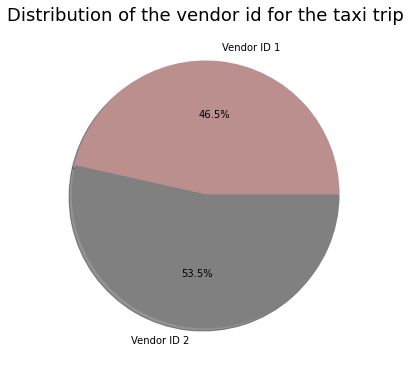

In [96]:
plt.figure(figsize = (6,8))
c=['rosybrown','gray']
plt.pie(total_percentage, labels = ['Vendor ID 1','Vendor ID 2'],autopct='%.1f%%',colors=c,shadow=True)
plt.title('Distribution of the vendor id for the taxi trip',fontsize=18)
plt.show()

 - We can observe that vendor 2 has a higher number of bookings (54%).


#Chart-2

In [97]:
df["store_and_fwd_flag"].value_counts()

N    1042766
Y       5809
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

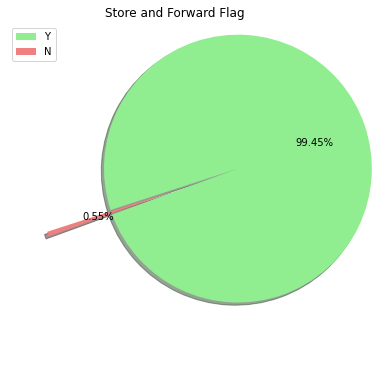

In [98]:
#Store & Forward flag

plt.figure(figsize=(6,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

* We see there are less than 1% of trips that were stored before forwarding.

#Chart-3

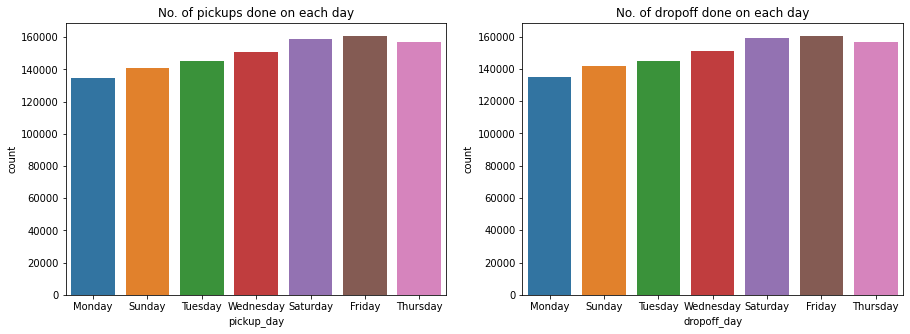

In [99]:
##Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x="pickup_day",data=df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')
sns.countplot(x="dropoff_day",data=df,ax=ax[1])
ax[1].set_title('No. of dropoff done on each day')
plt.show()

* Above plots interpret that in a week, "friday", and "saturday" have higher number of pickups and dropoffs.

* We can see that compared to other days, taxi booking rates are higher on the weekends ( Friday and Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.

#Chart-4

In [100]:
# diving the time in to different timezone
def timezone(x):
  if x>=6 and x<10:
    return "morning"
  elif x>=10 and x<16:
    return "mid day"
  elif x>=16 and x<22:
    return "evevning"
  elif x>=22 or x<6:
    return "late night"

In [101]:
#apply that function
df["pickup_time_zone"]=df.pickup_hour.apply(timezone)
df["dropoff_time_zone"]=df.dropoff_hour.apply(timezone)


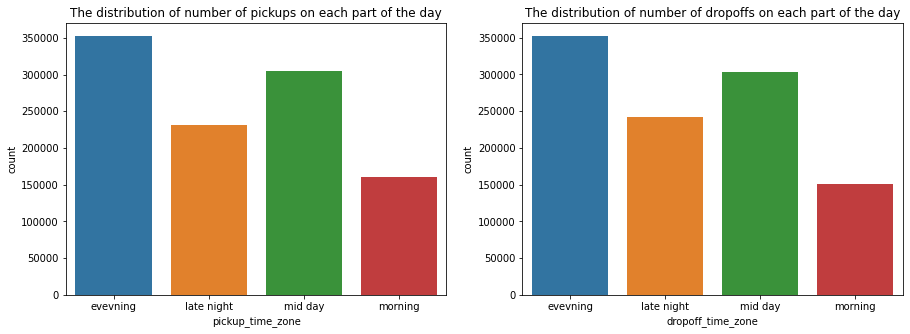

In [102]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_time_zone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_time_zone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

* we can see that evening is the busiet time of whole day. people take the taxi to come fro office and going for party at evening and dinner. after that at mid day maximum ride taken because people were going to office after 10 am.

#Chart-4

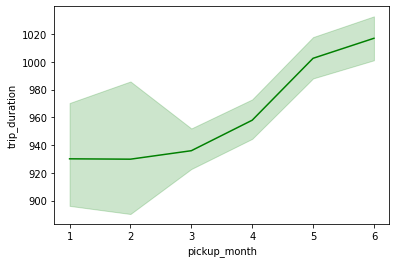

In [103]:
#Trip Duration by the month.
sns.lineplot(x='pickup_month',y='trip_duration',data=df,color='green')
plt.show()

* From February, we can see trip duration rising every month.

#Chart-5

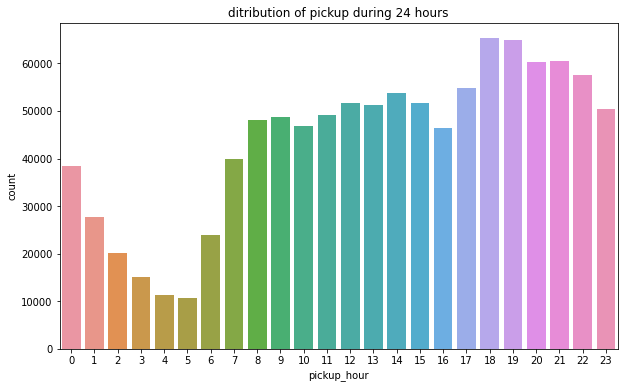

In [104]:
# distribution of ride in complete 24 hours hourly basis
plt.figure(figsize=(10,6))
sns.countplot(x=df["pickup_hour"])
plt.title("ditribution of pickup during 24 hours")
plt.show()

* Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening. We can see that people often use taxi services to get to their workplaces in the mornings after 10:00 AM. and busiet time is 6PM to 7PM.

#Chart-6

In [105]:
#aggegate vendor id by pickup month
monthly_pickup_by_vendor=df.groupby(["pickup_month","vendor_id"]).size()
monthly_pickup_by_vendor = monthly_pickup_by_vendor.unstack()


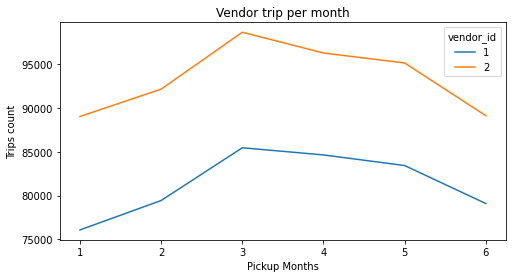

In [106]:
monthly_pickup_by_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')
plt.show()

* We can see that both vendors' trips are at their maximum in the month of March and their lowest in the month of January, February, and after June.

#Chart-7

In [107]:
#Passenger Count
df.passenger_count.value_counts()

1    743132
2    151078
5     56252
3     43033
6     34700
4     20336
0        39
7         3
9         1
8         1
Name: passenger_count, dtype: int64

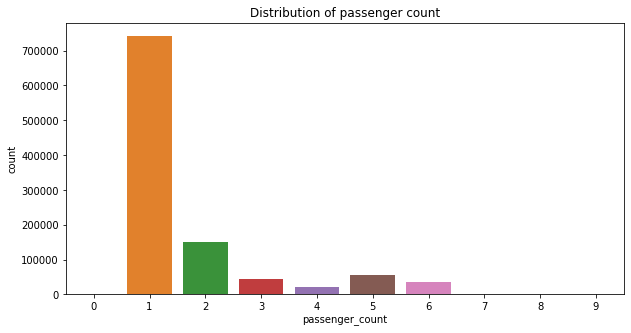

In [108]:
# distribution of passenger
plt.figure(figsize=(10,5))
sns.countplot(x=df["passenger_count"])
plt.title('Distribution of passenger count')
plt.show()

* We can notice that most of the bookings are made by solo traveler.which means less number of people prefer car pool or may be less number of groups book car...people prefer to ride solo

#Chart-8

In [109]:
# divide trip duration in differnt bins
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']

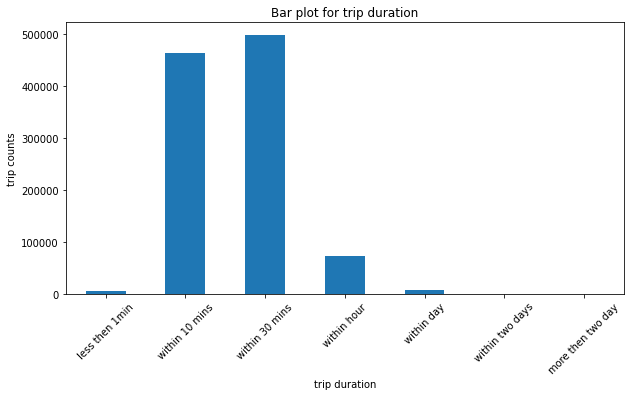

In [110]:
plt.figure(figsize=[10,5])
df1=pd.cut(df['trip_duration_in_minute'],bins=[0,1,10,30,60,1440,1440*2,50000],labels=labels)
df.groupby(df1)['trip_duration_in_minute'].count().plot(kind='bar')
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.xlabel("trip duration")
plt.xticks(rotation=45)
plt.show()

* By above chart we can see that most of trip duration 10 to 30 minute. some trip also goes on hourly.long trip with in day very rare.

#distribution of differnt features

In [111]:
# Histplots and boxplots to determine distribution the data given below
numeric_feature=['passenger_count','distance','trip_duration_in_minute','pickup_hour', 'dropoff_hour']
numeric_feature

['passenger_count',
 'distance',
 'trip_duration_in_minute',
 'pickup_hour',
 'dropoff_hour']

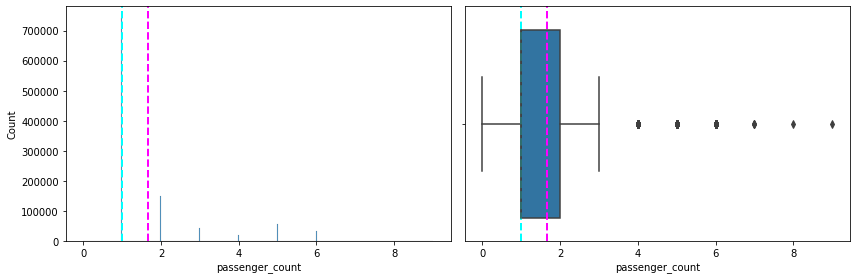

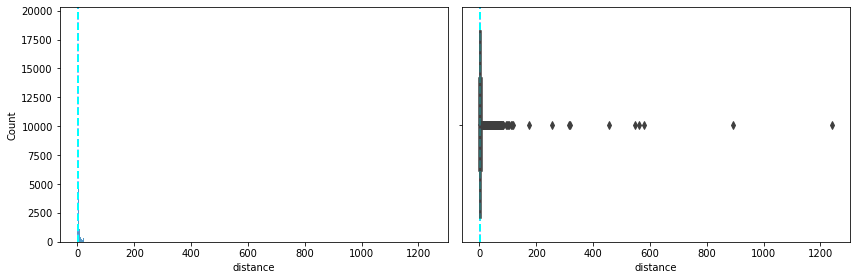

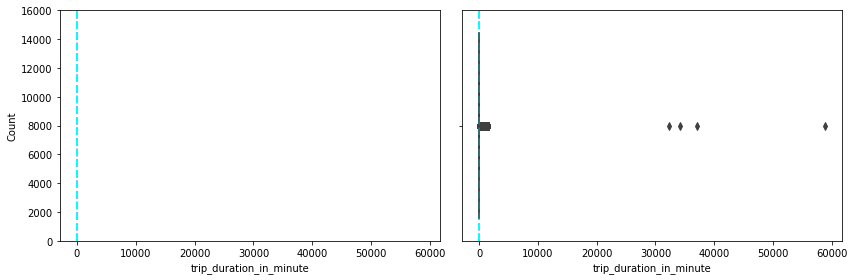

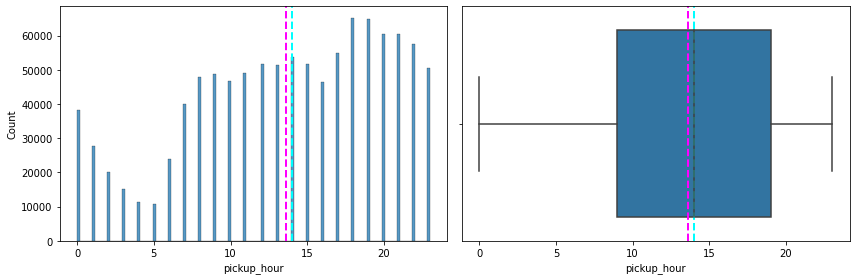

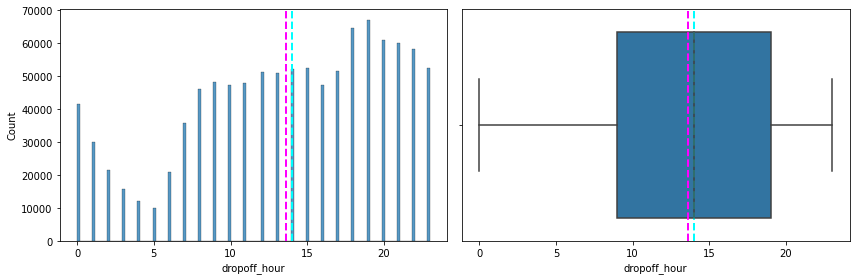

In [112]:
for col in numeric_feature:
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
  sns.histplot(data=df,x=col,ax=ax[0])
  ax[0].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[0].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  sns.boxplot(data=df, x=col, ax=ax[1])
  ax[1].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[1].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.tight_layout()

##(histplot) distance and trip_duration graphs are highly skewed.
##(boxplot) distance and trip_duration columns have a lot outliers as well

#Multicollinearity and correlation check

#**Heatmap**

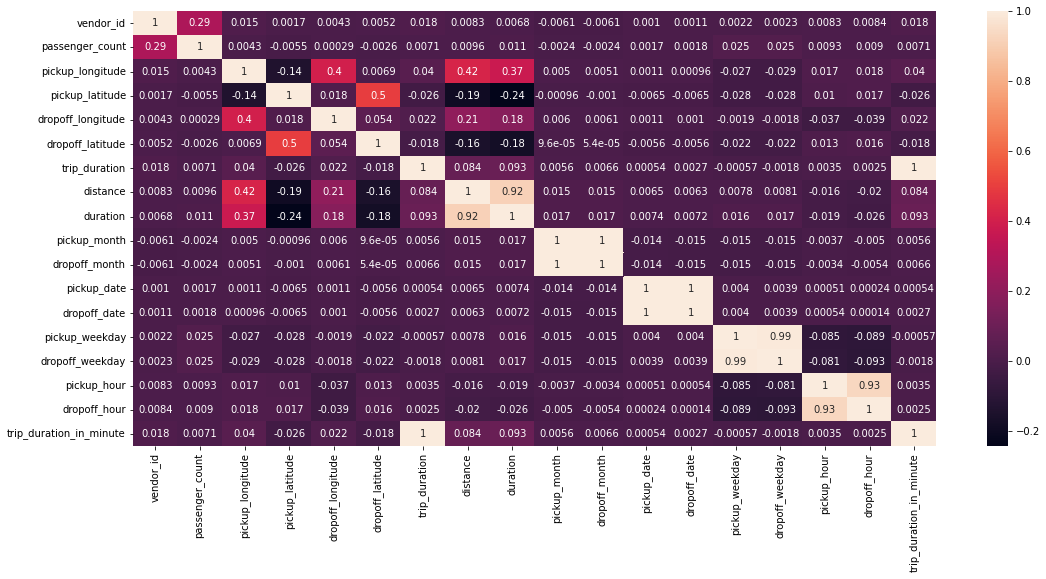

In [113]:
plt.figure(figsize=(18,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

* By above haetmap it visulaize that pickup_month and dropp off month is 100% correlated.Along with pickup hour ,dropoff hour,pickup weekday and dropoff week day,trip duration and trip duration in minute are highly correlated.

In [114]:
def correlated (dataset,thresold):
  corr_column=set()    # all the highly corelated column
  for i in range(len(correlation.columns)):
      for j in range(i):
        if abs(correlation.iloc[i,j])>=thresold:  # we want absolute value
          column_name=correlation.columns[i]      # getting the name of columns
          corr_column.add(column_name)            # add he name column in empty set
  return corr_column


In [115]:
# Calling the function with threshold value 0.90
highly_correlated_features=correlated(df,0.90)
print('total highly correlated features:',len(set(highly_correlated_features)))

total highly correlated features: 6


In [116]:
highly_correlated_features

{'dropoff_date',
 'dropoff_hour',
 'dropoff_month',
 'dropoff_weekday',
 'duration',
 'trip_duration_in_minute'}

* by above  evaluation we can say that there are four column  they are highly correlated above 90%.
* it better to drop higly correlated features for better performance.

#checking skewness of target variable

Text(0.5, 1.0, 'distribution after applying log transformation')

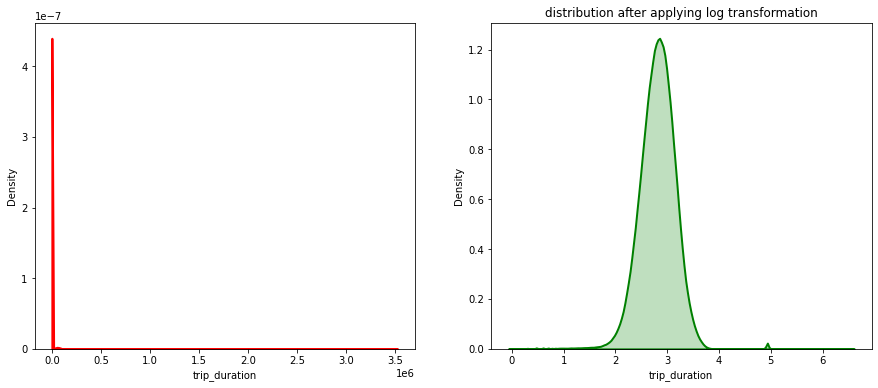

In [117]:
# dist plot of trip duration.
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.distplot(df.trip_duration,color='red',ax=ax[0],hist=False,kde_kws= {'shade':True, 'linewidth':2})
sns.distplot(np.log10(df["trip_duration"]),color='green',ax=ax[1],hist= False,kde= True,kde_kws= {'shade':True, 'linewidth':2})
ax[1].set_title("distribution after applying log transformation")


* BY above distribution we can see that target variable is higly right skewed .to remove the skewness we apply log transformation.after transformation we found normal distribution of targer variable.

#**Outlier Removal (Quartile Method)**

**Interquartile range measures the spread of the middle half of our data.**

**Formula: Q3 - Q1**

**where Q1- quartile 1 and Q3- quartile 3**

**lower limit of the data is given by Q1-1.5*IQR**

**upper limit of the data is given by Q3+1.5*IQR**

<AxesSubplot:xlabel='passenger_count'>

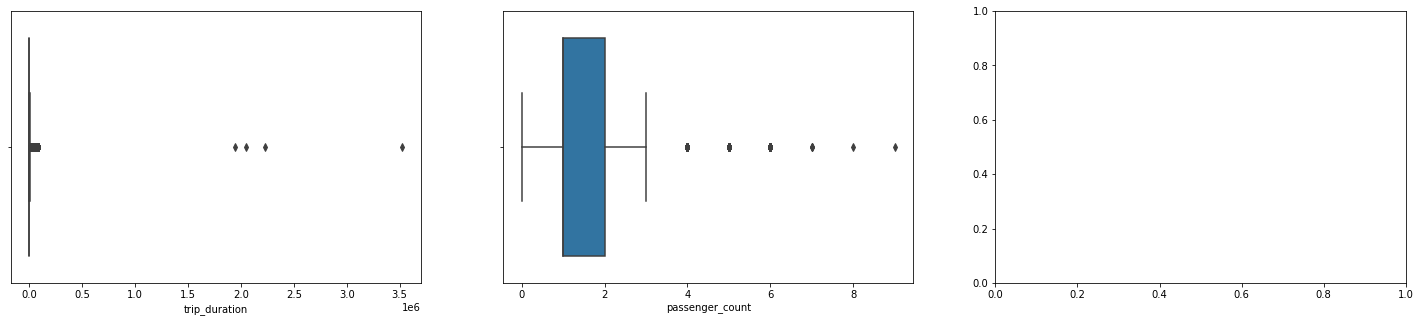

In [118]:
#boxplot for visualizing for outliers
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(25,5))
sns.boxplot(df["trip_duration"],ax=ax[0])
sns.boxplot(df['passenger_count'],ax=ax[1])


In [119]:
#finding differnt quarters of trip_duration column
trip_duration_Q1=df['trip_duration'].quantile(0.25)
print('first quartile value ie 25th percentile of trip duration:',trip_duration_Q1)
trip_duration_Q2=df['trip_duration'].quantile(0.50)
print('second quartile value ie 50th percentile of trip duration:',trip_duration_Q2)
trip_duration_Q3=df['trip_duration'].quantile(0.75)
print('third quartile value ie 75th percentile of trip duration:',trip_duration_Q3)

first quartile value ie 25th percentile of trip duration: 397.0
second quartile value ie 50th percentile of trip duration: 662.0
third quartile value ie 75th percentile of trip duration: 1075.0


In [120]:
# calculate interquartile range
IQR=trip_duration_Q3-trip_duration_Q1
print('IQR:',IQR)
trip_duration_lower_limit=trip_duration_Q1-1.5*IQR
trip_duration_upper_limit=trip_duration_Q3+1.5*IQR
print('The lower limit of trip duration:',trip_duration_lower_limit)
print('The upper limit of trip duration:',trip_duration_upper_limit)

IQR: 678.0
The lower limit of trip duration: -620.0
The upper limit of trip duration: 2092.0


In [121]:
#removing outliers in trip_duration features
df=df[df['trip_duration']>0]
df=df[df['trip_duration']<trip_duration_upper_limit]

In [122]:
df.shape

(995244, 26)

In [123]:
#finding differnt quarters of passenger_count column
passenger_count_Q1=df['passenger_count'].quantile(0.25)
print('first quartile value ie 25th percentile of passenger count:',passenger_count_Q1)
passenger_count_Q2=df['passenger_count'].quantile(0.50)
print('second quartile value ie 50th percentile of passenger count:',passenger_count_Q2)
passenger_count_Q3=df['passenger_count'].quantile(0.75)
print('third quartile value ie 75th percentile of passenger count:',passenger_count_Q3)

first quartile value ie 25th percentile of passenger count: 1.0
second quartile value ie 50th percentile of passenger count: 1.0
third quartile value ie 75th percentile of passenger count: 2.0


In [124]:
# Calculating IQR
IQR= passenger_count_Q3 - passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1 - 1.5*IQR
passenger_count_upper_limit=passenger_count_Q3 + 1.5*IQR
print("The lower limit of passenger count:", passenger_count_lower_limit)
print("The upper limit of passenger count:", passenger_count_upper_limit)

The lower limit of passenger count: -0.5
The upper limit of passenger count: 3.5


In [125]:
# Removing outliers
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<passenger_count_upper_limit]

In [126]:
df.shape

(889990, 26)

In [127]:
#finding differnt quarters of distance column
distance_Q1=df['distance'].quantile(0.25)
print('first quartile value ie 25th percentile of distance:',distance_Q1)
distance_Q2=df['distance'].quantile(0.50)
print('second quartile value ie 50th percentile of distance:',distance_Q2)
distance_Q3=df['distance'].quantile(0.75)
print('third quartile value ie 75th percentile of distance:',distance_Q3)

first quartile value ie 25th percentile of distance: 1.198209720642124
second quartile value ie 50th percentile of distance: 1.9924365857930693
third quartile value ie 75th percentile of distance: 3.486445593193004


In [128]:
# Calculating IQR
IQR= distance_Q3 - distance_Q1
distance_lower_limit=distance_Q1 - 1.5*IQR
distance_upper_limit=distance_Q3 + 1.5*IQR
print("The lower limit of distance:", distance_lower_limit)
print("The upper limit of distance:", distance_upper_limit)

The lower limit of distance: -2.2341440881841956
The upper limit of distance: 6.9187994020193235


In [129]:
# Removing outliers
df=df[df['distance']>0]
df=df[df['distance']<distance_upper_limit]

In [130]:
df.shape

(817095, 26)

<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

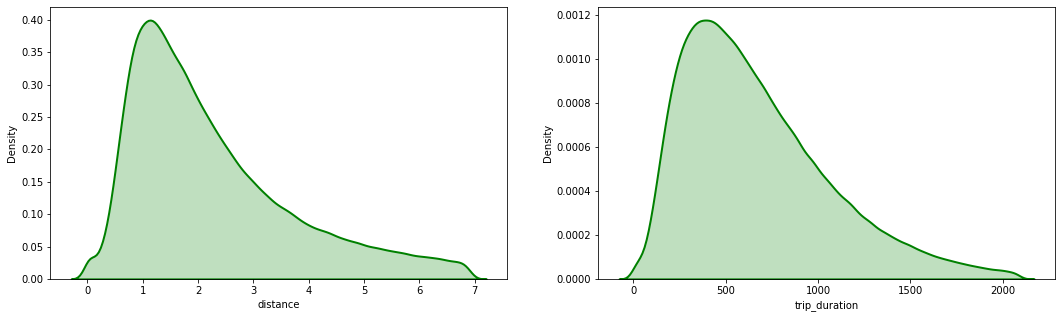

In [131]:
# Earlier we saw that distance and tripduration had highly skewed graph... lets check the distribution again
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
sns.distplot(df['distance'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="green", ax=ax[0])
sns.distplot(df['trip_duration'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="green", ax=ax[1])

##It seems both the columns now follow near to normal distribution

#**Textual Data Preprocessing**

#ONE HOT ENCODING
###Since we have textual data in our dataset which might create problems during model prediction, therefore we need to convert this textual data into dummy variables

In [132]:
#add dummy variable to convert textual data to numerical data through one hot encoding
df=pd.get_dummies(df,columns=['store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday'],drop_first=True)

In [133]:
df.shape

(817095, 36)

#Instead of dropping irrelevant or collinear columns we will be creating a separate list containg only those variables that are important and are not collinear
##(dropoff_date', 'dropoff_hour', 'dropoff_month', 'dropoff_weekday', 'trip_duration_minute are highly correlated according to the heatmap.)

In [134]:
features=['vendor_id', 'passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_Y','pickup_weekday_1',
          'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6']

In [135]:
final_df=df[features]
final_df.shape

(817095, 14)

#**STEP 8 - Supervised Machine Learning of NYC taxi trip time**

#**Evaluating which model is better. Therefore we will be calculating evaluation metrics for different models**

In [136]:
# define a  function to calculate evaluation metrics
def evaluation_metrics (x_train,y_train,y_predicted):
  MSE=round(mean_squared_error(y_true=y_train, y_pred=y_predicted),4)
  RMSE=math.sqrt(MSE)
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)
  Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

  print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
  print("R2 Score :",R2_score,"Adjusted R2 Score :",Adjusted_R2_score)
  # plotting actual and predicted values
  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red')
  plt.plot(np.array(y_train)[:100], color='green')
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  #return(MSE,RMSE,R2_score,Adjusted_R2_score)

In [137]:
x=final_df[features]
y=df["trip_duration_in_minute"]


In [138]:
# Importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#**Model 1 - Linear Regression**

In [139]:
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.score(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


Mean Squared Error: 22.3261 Root Mean Squared Error: 4.725050264282911
R2 Score : 0.4917681538974408 Adjusted R2 Score : 0.4917572686742969


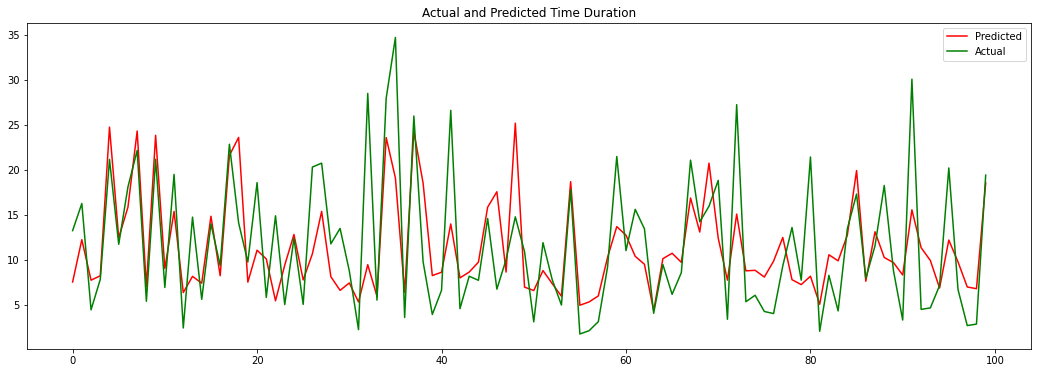

In [140]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pred_train)

Mean Squared Error: 22.3786 Root Mean Squared Error: 4.7306024986253075
R2 Score : 0.492032501978525 Adjusted R2 Score : 0.4919889807368645


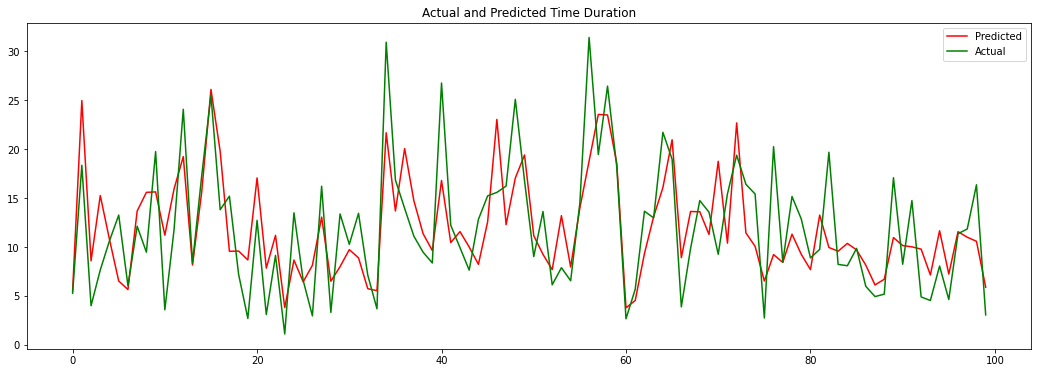

In [141]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pred_test)

#Inference - As we can see that R2 score is very less and MSE is pretty high which means this algorithm is not suitable for our model

#**Model 2 - Decision Tree**

In [142]:
# Maximum depth of trees
max_depth = [4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [6,10,16,20]

# Hyperparameter Grid
param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
DTR = DecisionTreeRegressor()

# Grid search
decision_tree_grid = GridSearchCV(estimator=DTR,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')
decision_tree_grid.fit(x_train,y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=10 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=10, total=   1.9s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=10 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=10, total=   1.5s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=10 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=10, total=   1.5s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=10 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=10, total=   1.5s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=10 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=10, total=   1.6s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=20 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=20, total=   1.6s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=20 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=20, total=   1.5s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=20 ...........
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=20, total=   1.5s
[CV] max_depth=4, min_samples_leaf=6, min_samples

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 15.0min finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [6, 10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [143]:
decision_tree_grid.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=20, min_samples_split=30)

In [144]:
decision_tree_grid.best_score_

0.5592939415182867

In [145]:
decision_tree_optimal_model =decision_tree_grid.best_estimator_
y_predict_train_decision_tree=decision_tree_optimal_model.predict(x_train)
y_predict_test_decision_tree=decision_tree_optimal_model.predict(x_test)

Mean Squared Error: 18.5018 Root Mean Squared Error: 4.301371874181538
R2 Score : 0.5788242778741512 Adjusted R2 Score : 0.5788152572042478


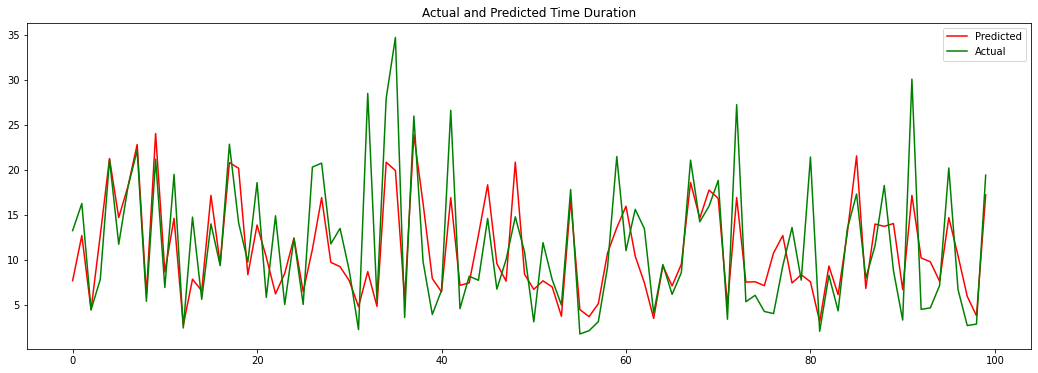

In [146]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_decision_tree)

Mean Squared Error: 19.3171 Root Mean Squared Error: 4.39512229636446
R2 Score : 0.5615251870533178 Adjusted R2 Score : 0.5614876197515304


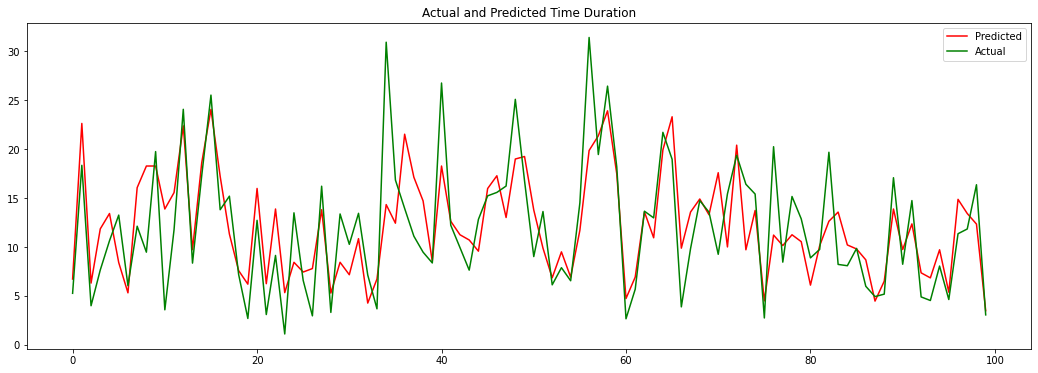

In [147]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_decision_tree)

##Inference - This algorithm is better than the previous one (linear regression) but still the accuracy score is low.

#**Model 3 - Random Forest**

In [148]:
RFR=RandomForestRegressor()

In [149]:
# number of trees in random forest
n_estimators=[20,22,24]
#number of feature to consider at every split
max_features=[0.6]
# maximum number of level in trees
max_depth=[10,16]
#number of samples
max_samples=[0.75,1.0]

# Hyperparameter Grid
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            }
print(param_grid)


{'n_estimators': [20, 22, 24], 'max_features': [0.6], 'max_depth': [10, 16], 'max_samples': [0.75, 1.0]}


In [150]:
RF_grid=GridSearchCV(estimator=RFR,param_grid=param_grid,cv=2,verbose=2)

In [151]:
RF_grid.fit(x_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20, total=  15.8s
[CV] max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s


[CV]  max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20, total=  14.9s
[CV] max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22 
[CV]  max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22, total=  16.9s
[CV] max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22 
[CV]  max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22, total=  16.4s
[CV] max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24 
[CV]  max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24, total=  17.8s
[CV] max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24 
[CV]  max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24, total=  18.0s
[CV] max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20 
[CV]  max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20 
[CV]  max_depth=10, max_features=0.6, max_samples

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.1min finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 16], 'max_features': [0.6],
                         'max_samples': [0.75, 1.0],
                         'n_estimators': [20, 22, 24]},
             verbose=2)

In [152]:
RF_grid.best_params_

{'max_depth': 16, 'max_features': 0.6, 'max_samples': 0.75, 'n_estimators': 24}

In [153]:
RF_grid.best_score_

0.5981581641781231

In [154]:
Random_Forest_optimal_model =RF_grid.best_estimator_
y_predict_train_Random_Forest=Random_Forest_optimal_model.predict(x_train)
y_predict_test_Random_Forest=Random_Forest_optimal_model.predict(x_test)

Mean Squared Error: 14.1646 Root Mean Squared Error: 3.7635887129174996
R2 Score : 0.6775579931092501 Adjusted R2 Score : 0.6775510871012483


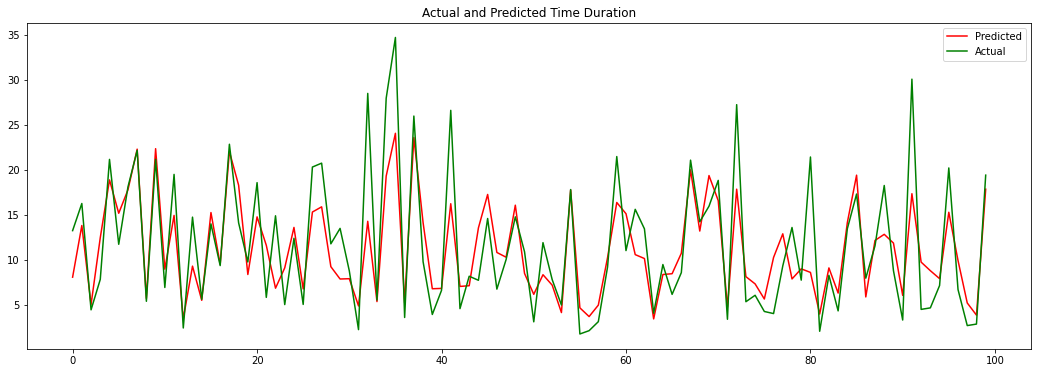

In [155]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_Random_Forest)

# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_Random_Forest)

##This algorithm has performed a little better that the previous one (accuracy score:67% train, 60% test).

In [ ]:
##Only Random Forest has least errors, therefore it can be considered as good algorithm for training our model.